# K-近邻算法 （kNN）

> K-近邻算法 (KNN)工作原理: 存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中第一数据与所属分类的对应关系。输入并没有标签的新数据后，将新的数据每个特征与样本集中数据对应的特征进行比较，然后算法提取样本集中特征相似数据(最近邻)的分类标签。一般来说，我们只选择样本数据休中前k个最相似的数据，这就是k-近邻算法的出处，通常k是不大于20的整数。

* 优点: 精度高，对异常值不敏感，无数据输入假定
* 缺点: 计算复杂度高，空间复杂度高
* 适用数据范围: 数值型和标称型

### **Note:** `LaTex`数学公式语法请参见: 
* http://blog.csdn.net/GarfieldEr007/article/details/51646604
* http://blog.csdn.net/u012501459/article/details/49617805
* http://blog.csdn.net/qq_39232265/article/details/78868487
* 在线生成 LaTex工具: http://latex.codecogs.com/eqneditor/editor.php

## 距离计算公式
* 1.欧氏距离公式
> 欧氏距离是最易于理解的一种距离计算方法，源自欧氏空间中两点间的距离公式
> 计算两个向量点 xA和xB之间的距离,数学公式为:
> $$d = \sqrt{(xA_0 - xB_0)^{2} + (xA_1 - xB_1)^{2}}$$
  * I.E: 点 （0,0）与 (1,2)之间的距离为:
  $$\sqrt{(1-0)^{2} + (2-0)^{2}}$$
  * 点(1,0,0,1) 与 (7,6,9,4)之间的距离为:
  $$ \sqrt{(7-1)^{2} - (6-0)^{2} - (9-0)^{2} - (4-1)^{2}} $$
  
* 2.曼哈顿距离
> 从名字就可以猜出这种距离的计算方法了。想象你在曼哈顿要从一个十字路口开车到另外一个十字路口，驾驶距离是两点间的直线距离吗？显然不是，除非你能穿越大楼。实际驾驶距离就是这个“曼哈顿距离”。而这也是曼哈顿距离名称的来源， 曼哈顿距离也称为 **城市街区距离(City Block distance)**。
> 1. 二维平面两点a(x1,y1)与b(x2,y2)间的曼哈顿距离
> $$d12= |x_1 - x_2| + |y_1 - y_2|$$
> 2. 两个n维向量a(x11,x12,…,x1n)与 b(x21,x22,…,x2n)间的曼哈顿距离
> $$d12 = \sum_{i}^{n} |x_1k - x_2k|$$
* 3.信息熵
> 信息熵是衡量分布的混乱程度或分散程度的一种度量。分布越分散(或者说分布越平均)，信息熵就越大。分布越有序（或者说分布越集中），信息熵就越小。
> 计算给定的样本集X的信息熵的公式：
> $$Entropy(X) = \sum_{i}^{n}-p_ilog_2p_i$$


## k-近邻算法

In [128]:
from numpy import *
import operator
from os import listdir
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
def createDataSet():
    groups = array([[1.0, 1.1],[1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return groups, labels

In [5]:
def classify0(inX, dataSet, labels, k):
    dataSize = dataSet.shape[0]
    ## Start 计算距离
    diffMat = tile(inX, (dataSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances ** 0.5
    ## END 计算距离
    
    sortedDistIndicies = distances.argsort()
    classCount = {}
    ## Start 选择距离最小
    for i in range(k):
        voteLabel = labels[sortedDistIndicies[i]]
        classCount[voteLabel] =  classCount.get(voteLabel,0) + 1
    ## END 选择距离最小        
    
    ## 排序
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    
    return sortedClassCount[0][0]
    

In [16]:
groups, labels = createDataSet()
print groups
print labels

print classify0([0,0], groups, labels, 3)
print classify0([1.0,1], groups, labels, 3)
print classify0([0.3, 0.5], groups, labels, 3)


[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']
B
A
B


In [38]:
DEFINED_LABELS={
    'largeDoses': 3,
    'smallDoses': 2,
    'didntLike': 1
}

def file2matrix(filename):
    f = open(filename)
    arrayOLines = f.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(DEFINED_LABELS[listFromLine[-1]]))
        index+=1
        
    return returnMat, classLabelVector    

In [43]:
datingDataMatrix, datingLabels = file2matrix("data/datingTestSet.txt")
print datingDataMatrix[:20,]
print datingLabels[:20]

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 [7.5136000e+04 1.3147394e+01 4.2896400e-01]
 [3.8344000e+04 1.6697880e+00 1.3429600e-01]
 [7.2993000e+04 1.0141740e+01 1.0329550e+00]
 [3.5948000e+04 6.8307920e+00 1.2131920e+00]
 [4.2666000e+04 1.3276369e+01 5.4388000e-01]
 [6.7497000e+04 8.6315770e+00 7.4927800e-01]
 [3.5483000e+04 1.2273169e+01 1.5080530e+00]
 [5.0242000e+04 3.7234980e+00 8.3191700e-01]
 [6.3275000e+04 8.3858790e+00 1.6694850e+00]
 [5.5690000e+03 4.8754350e+00 7.2865800e-01]
 [5.1052000e+04 4.6800980e+00 6.2522400e-01]
 [7.7372000e+04 1.5299570e+01 3.3135100e-01]
 [4.3673000e+04 1.8894610e+00 1.9128300e-01]
 [6.1364000e+04 7.5167540e+00 1.2691640e+00]
 [6.9673000e+04 1.4239195e+01 2.6133300e-01]
 [1.5669000e+04 0.0000000e+00 1.2501850e+00]
 [2.8488000e+04 1.0528555e+01 1.3048440e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]


**datingDataMatrix** 解析
- 第1列: 每年飞行里程数
- 第2列: 玩视频游戏所耗时间百分比
- 第3列: 每周所消费的冰淇淋公升数

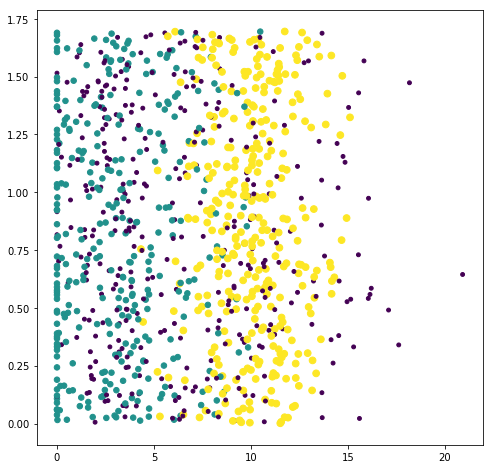

In [59]:
fig = plt.figure(figsize=(8,8))
                 
plt.scatter(datingDataMatrix[:,1], datingDataMatrix[:,2], 15.0*array(datingLabels), 20.0*array(datingLabels))

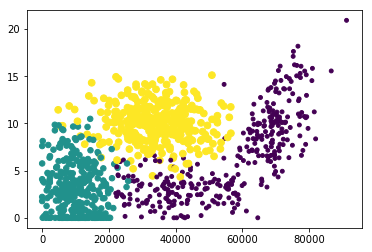

In [61]:
plt.scatter(datingDataMatrix[:,0], datingDataMatrix[:,1], 15.0*array(datingLabels), 20.0*array(datingLabels))

### 归一化
> 在处理不同取值范围的特征值时，我们通常采用的方法是将数值归一化，如将取值范围处理为[0,1]或者是[-1,1]区间上。
> 下面的公式可将将任何取值范围的特征值转化为 [0,1]区间上:


>        newValue = (oldValue - min) / (max - min)

In [63]:
def autoNormal(dataSet):
    # '0' 表示找 当前 「列」中最大/小值
    minValues = dataSet.min(0)
    maxValues = dataSet.max(0)
    ranges = maxValues - minValues
    normalDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normalDataSet = dataSet - tile(minValues, (m,1))
    normalDataSet = normalDataSet/tile(ranges, (m,1))
    
    return normalDataSet, ranges, minValues

In [67]:
norMat, ranges, minValues = autoNormal(datingDataMatrix)
print norMat
print '>>>ranges:', ranges
print '>>>Min Values:',minValues


[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
>>>ranges: [9.1273000e+04 2.0919349e+01 1.6943610e+00]
>>>Min Values: [0.       0.       0.001156]


In [76]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('data/datingTestSet.txt')
    normMat, ranges, minValues = autoNormal(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classfierResult = classify0(normMat[i,:], normMat[numTestVecs:m,], datingLabels[numTestVecs:m], 3)
        print('the classfier came back with %d, the real answer is %d ' % (classfierResult, datingLabels[i]))
        
        if(classfierResult != datingLabels[i]):
            errorCount+= 1
        print('the total error rate is: %f ' % (errorCount/float(numTestVecs)))     

In [77]:
datingClassTest()

the classfier came back with 3, the real answer is 3 
the total error rate is: 0.000000 
the classfier came back with 2, the real answer is 2 
the total error rate is: 0.000000 
the classfier came back with 1, the real answer is 1 
the total error rate is: 0.000000 
the classfier came back with 1, the real answer is 1 
the total error rate is: 0.000000 
the classfier came back with 1, the real answer is 1 
the total error rate is: 0.000000 
the classfier came back with 1, the real answer is 1 
the total error rate is: 0.000000 
the classfier came back with 3, the real answer is 3 
the total error rate is: 0.000000 
the classfier came back with 3, the real answer is 3 
the total error rate is: 0.000000 
the classfier came back with 1, the real answer is 1 
the total error rate is: 0.000000 
the classfier came back with 3, the real answer is 3 
the total error rate is: 0.000000 
the classfier came back with 1, the real answer is 1 
the total error rate is: 0.000000 
the classfier came ba

# KNN 手写数字识别
* data/digits/trainingDigits 目录中大约有 2K个样本
* data/digits/testDigits 目录中大约有 900个测试样本

> 为了使用前面的代码，我们必须将图像格式处理为一个向量。我们将把一个32 X 32 的二进制图像矩阵转换为 1 X 1024的向量。**img2vector**函数正是做这件事情

In [131]:
def img2vector(filename):
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline().strip()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
            
    return returnVect             

In [123]:
vec0 = img2vector("data/digits/trainingDigits/0_0.txt")
vec31=img2vector("data/digits/trainingDigits/0_31.txt")

print vec0[0,0:31]
print vec31[0,32:63]

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [183]:
# 手写数字识别代码
def handwritingClassTest():
    hwLabels=[]
    basepath='data/digits/'
    train_path=os.path.join(basepath,'trainingDigits')
    test_path=os.path.join(basepath,'testDigits')
    trainingFileList = listdir(train_path)
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    
    # 从文件名解析分类数字
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0].strip()
        classNumStr = fileStr.split('_')[0].strip()
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector(os.path.join(train_path,fileNameStr))
    
    testFileList = listdir(test_path)
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0].strip()
        real_number = int(fileStr.split('_')[0].strip())
        vectorUnderTest = img2vector(os.path.join(test_path, fileNameStr))
        classfierResult = int(classify0(vectorUnderTest, trainingMat, hwLabels, 3))
        
        if (classfierResult != real_number):
            errorCount += 1
            print ('%d. the classfier came back with: %d, the real answer is: %d, the test file name: %s' 
                   % (errorCount, classfierResult, real_number, fileNameStr))
       
    print '--------------------------------------------------------'
    print 'The total number of errors is: %d' % errorCount
    print 'The total error rate is: %f%% ' % ((errorCount/float(mTest))*100)

In [179]:
# k = 3 result
print '--------------------------------------------------------------------------------------'
print '               k = 3'
print '--------------------------------------------------------------------------------------'
handwritingClassTest()

--------------------------------------------------------------------------------------
               k = 3
--------------------------------------------------------------------------------------
1. the classfier came back with: 7, the real answer is: 1, the test file name: 1_86.txt
2. the classfier came back with: 9, the real answer is: 3, the test file name: 3_11.txt
3. the classfier came back with: 9, the real answer is: 3, the test file name: 3_55.txt
4. the classfier came back with: 3, the real answer is: 5, the test file name: 5_42.txt
5. the classfier came back with: 6, the real answer is: 5, the test file name: 5_43.txt
6. the classfier came back with: 6, the real answer is: 8, the test file name: 8_11.txt
7. the classfier came back with: 3, the real answer is: 8, the test file name: 8_23.txt
8. the classfier came back with: 1, the real answer is: 8, the test file name: 8_36.txt
9. the classfier came back with: 1, the real answer is: 8, the test file name: 8_45.txt
10. the class

**分析**
* 当 k=3时，KNN手写数字识别的错误率约于 1.2%，还是不错的

In [181]:
# k = 5 result
print '--------------------------------------------------------------------------------------'
print '               k = 5'
print '--------------------------------------------------------------------------------------'
handwritingClassTest()

--------------------------------------------------------------------------------------
               k = 5
--------------------------------------------------------------------------------------
1. the classfier came back with: 7, the real answer is: 1, the test file name: 1_86.txt
2. the classfier came back with: 9, the real answer is: 3, the test file name: 3_11.txt
3. the classfier came back with: 8, the real answer is: 3, the test file name: 3_49.txt
4. the classfier came back with: 9, the real answer is: 3, the test file name: 3_55.txt
5. the classfier came back with: 0, the real answer is: 4, the test file name: 4_46.txt
6. the classfier came back with: 9, the real answer is: 5, the test file name: 5_33.txt
7. the classfier came back with: 3, the real answer is: 5, the test file name: 5_42.txt
8. the classfier came back with: 6, the real answer is: 8, the test file name: 8_11.txt
9. the classfier came back with: 3, the real answer is: 8, the test file name: 8_23.txt
10. the class

**分析**
* 当 k=5时，KNN手写数字识别的错误率约于 1.8%，还是不错的, 与 k=3时相比较(1.2%)，错误率上升了 **0.6%**, 因些当使用 `KNN`时，k的取值范围非常重要(直接影响正确率)

## 总结
实际使用 `KNN`对手写数字识别时，算法的执行效率并不高。国为算法需要为每个测试向量做大约2000次距离的计算,每个距离计算包括了1024个维度的浮点运算，总计要执行 900次，此外，我们还需要为测试向量准备2MB的存储空间。


是否存在一种算法减少存储空间和计算时间的开销呢？`k决策树`就是`k-近邻`